# Cross validation on Learning rate shedulers

MNIST Learning Rate Scheduling with Cross-Validation
Select an example to run:
1. Full experiment with all schedules (may take a long time)
2. Compare two schedules with fewer folds (faster)
3. Run components separately for more control
4. Train a single model with custom learning rate schedule


Enter your choice (1-4):  1


Running full experiment with all learning rate schedules
Starting complete experiment with 4 schedules and 5 folds

Starting cross-validation for plateau schedule

Training Fold 1 with plateau learning rate schedule
Epoch 1/20
375/375 [==============================] - 18s 47ms/step - loss: 0.3527 - accuracy: 0.8888 - val_loss: 0.0727 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 2/20
375/375 [==============================] - 16s 43ms/step - loss: 0.0969 - accuracy: 0.9709 - val_loss: 0.0470 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 3/20
375/375 [==============================] - 17s 46ms/step - loss: 0.0664 - accuracy: 0.9813 - val_loss: 0.0505 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 4/20
375/375 [==============================] - 18s 47ms/step - loss: 0.0537 - accuracy: 0.9839 - val_loss: 0.0369 - val_accuracy: 0.9889 - lr: 0.0010
Epoch 5/20
375/375 [==============================] - 17s 45ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0362 - val_accuracy: 0.9892 - lr: 0.0010

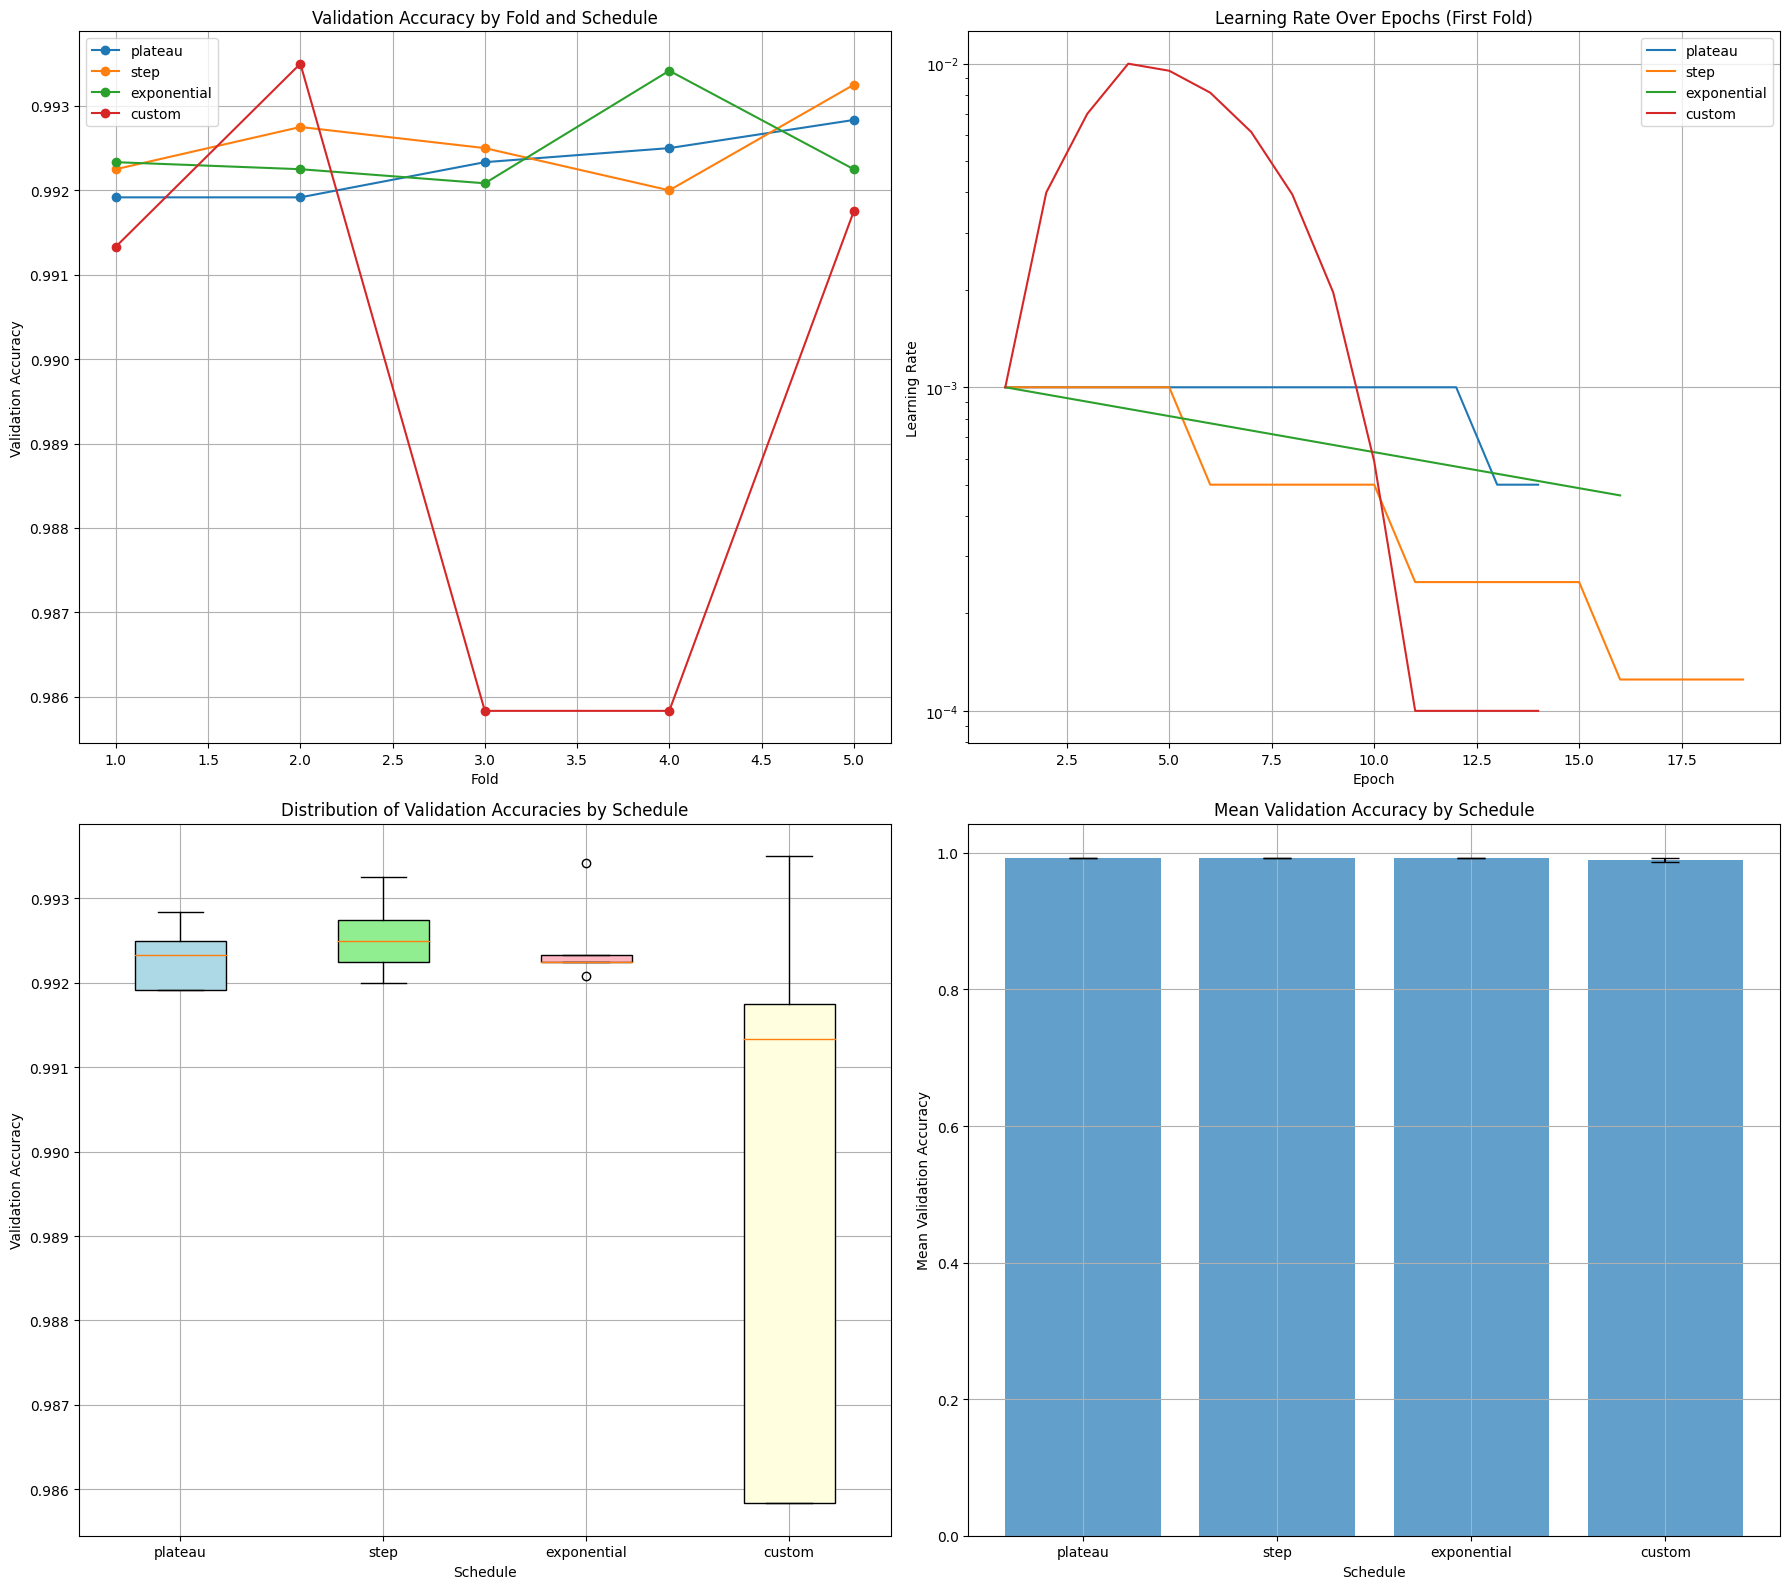

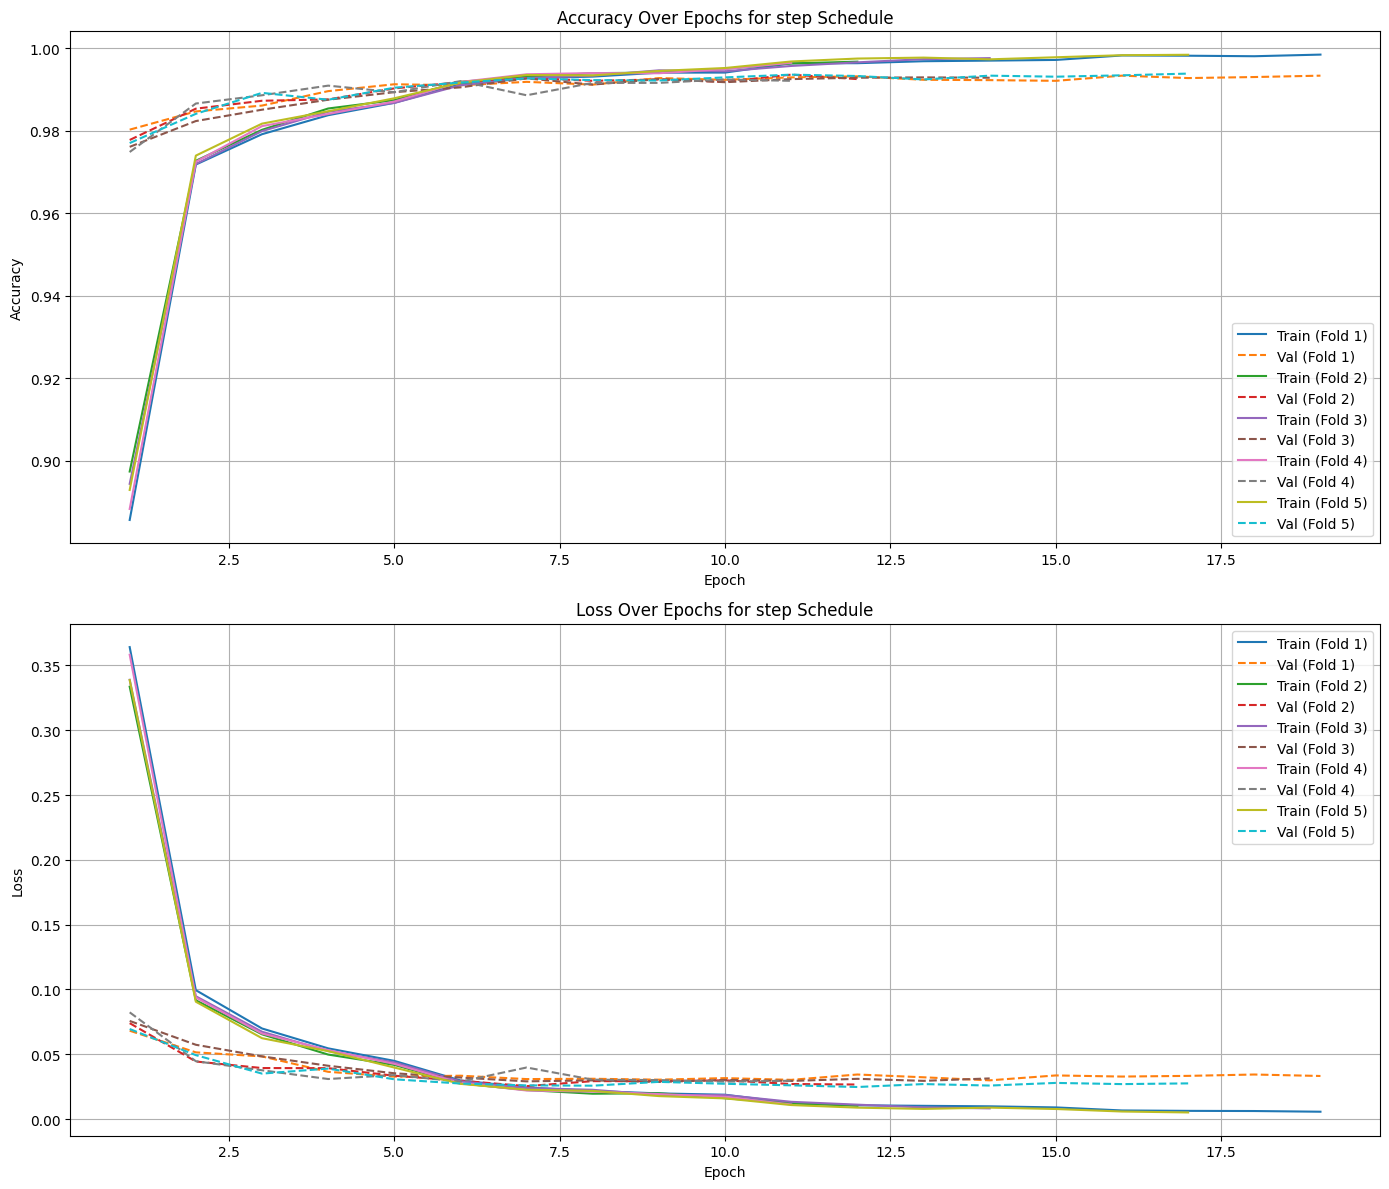


Training final model with step schedule on all data

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/20
422/422 [==============================] - ETA: 0s - loss: 0.2941 - accuracy: 0.9074  
Epoch 1: val_accuracy improved from -inf to 0.97850, saving model to final_model_step.h5
422/422 [==============================] - 19s 43ms/step - loss: 0.2941 - accuracy: 0.9074 - val_loss: 0.0697 - val_accuracy: 0.9785 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/20
  3/422 [..............................] - ETA: 16s - loss: 0.0682 - accuracy: 0.9766

C:\Users\josep\anaconda3\envs\TF2.0\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


421/422 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.9764 
Epoch 2: val_accuracy improved from 0.97850 to 0.98833, saving model to final_model_step.h5
422/422 [==============================] - 17s 41ms/step - loss: 0.0797 - accuracy: 0.9764 - val_loss: 0.0406 - val_accuracy: 0.9883 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/20
422/422 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9848 
Epoch 3: val_accuracy improved from 0.98833 to 0.98850, saving model to final_model_step.h5
422/422 [==============================] - 17s 41ms/step - loss: 0.0543 - accuracy: 0.9848 - val_loss: 0.0407 - val_accuracy: 0.9885 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/20
422/422 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9866 
Epoch 4: val_accuracy improved from 0.98850 to 0.99100, saving model to final_model_step.h5
422/422 [===============

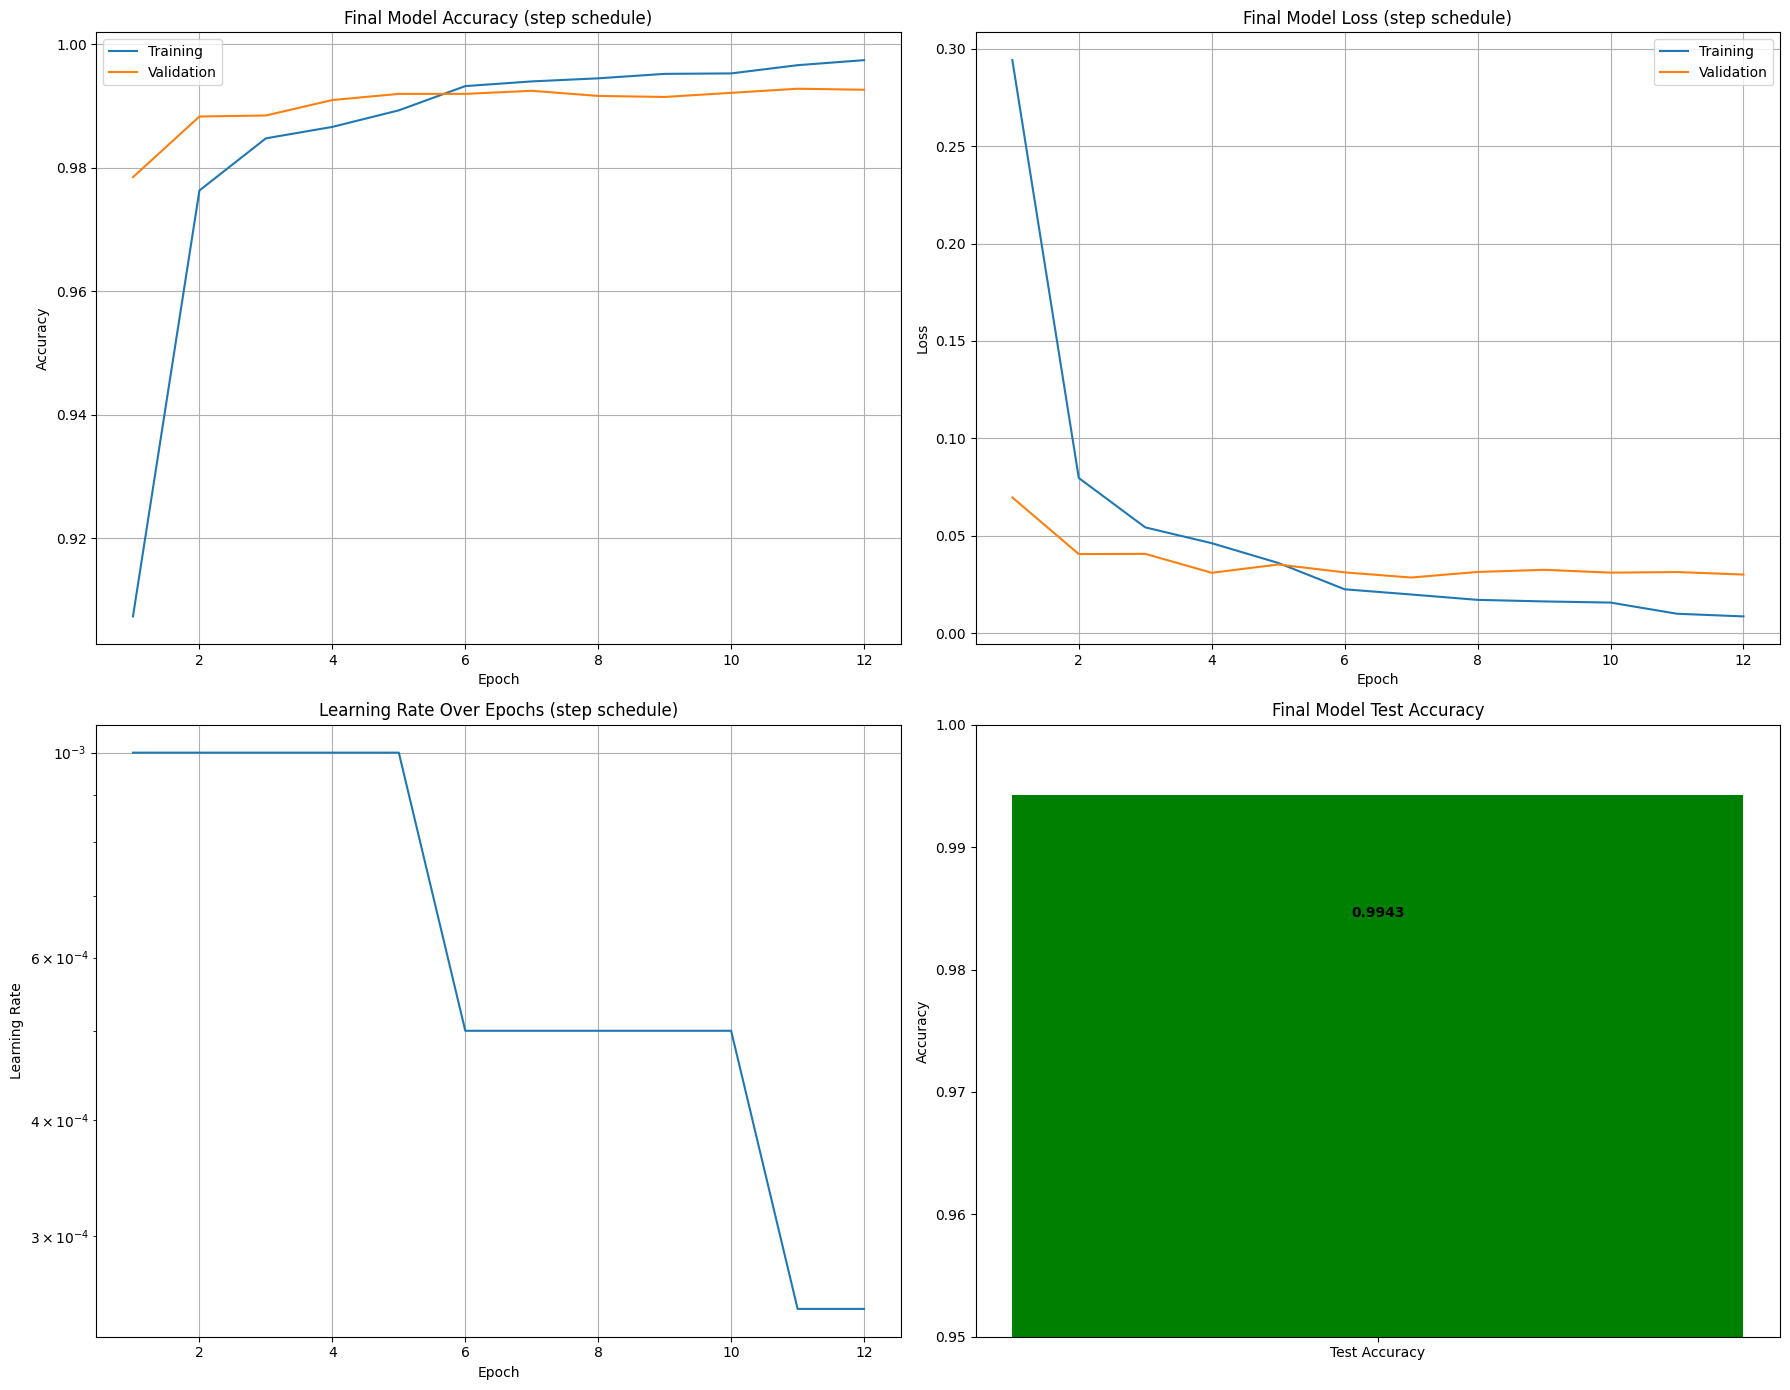


Total experiment time: 79.72 minutes
Best learning rate schedule: step

Execution completed in 79.72 minutes


In [4]:
"""
Example usage of the MNIST learning rate scheduler with cross-validation module.

This script demonstrates how to run the experiment with different configurations.
"""

import lr_cv_module as mlcv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure GPU memory growth if needed (prevents TensorFlow from taking all GPU memory)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Example 1: Run a full experiment with all learning rate schedules
def run_full_experiment():
    print("Running full experiment with all learning rate schedules")
    experiment_results = mlcv.run_complete_experiment(
        schedules=['plateau', 'step', 'exponential', 'custom'],
        num_folds=5,
        cv_epochs=20,
        final_epochs=20,
        batch_size=128,
        initial_lr=0.001
    )
    
    print(f"Best learning rate schedule: {experiment_results['best_schedule']}")
    return experiment_results

# Example 2: Compare only two learning rate schedules with fewer folds (faster)
def compare_two_schedules():
    print("Comparing only 'plateau' and 'custom' learning rate schedules")
    experiment_results = mlcv.run_complete_experiment(
        schedules=['plateau', 'custom'],
        num_folds=5,  
        cv_epochs=20,  
        final_epochs=20,
        batch_size=128,
        initial_lr=0.001
    )
    
    print(f"Best learning rate schedule: {experiment_results['best_schedule']}")
    return experiment_results

# Example 3: Run each component separately for more control
def run_components_separately():
    print("Running experiment components separately")
    
    # 1. Load data
    x_train, y_train, x_test, y_test = mlcv.load_and_prepare_data()
    print(f"Data loaded: {x_train.shape[0]} training samples, {x_test.shape[0]} test samples")
    
    # 2. Cross-validate with just two schedules
    schedules = ['step', 'plateau']
    cv_results = mlcv.cross_validate_schedules(
        schedules=schedules,
        num_folds=5,
        epochs=20,
        batch_size=128
    )
    
    # 3. Analyze results
    analysis = mlcv.analyze_cv_results(cv_results)
    best_schedule = analysis['best_schedule']
    print(f"Best schedule from CV: {best_schedule}")
    
    # 4. Plot CV results
    mlcv.plot_cv_results(cv_results, analysis)
    
    # 5. Train final model with best schedule
    final_results = mlcv.train_final_model(
        best_schedule=best_schedule,
        epochs=20
    )
    
    print(f"Final test accuracy: {final_results['test_accuracy']:.4f}")
    
    # 6. Plot final model results
    mlcv.plot_final_model_results(final_results, best_schedule)
    
    return {
        'cv_results': cv_results,
        'analysis': analysis,
        'final_results': final_results
    }

# Example 4: Create and train a model with a specific learning rate schedule
def train_specific_model():
    print("Training a model with custom learning rate schedule")
    
    # Create model with custom LR
    model = mlcv.create_cnn_model(learning_rate=0.002)
    
    # Get learning rate callbacks
    callbacks, lr_history = mlcv.get_lr_callbacks('custom', initial_lr=0.002)
    
    # Load data
    x_train, y_train, x_test, y_test = mlcv.load_and_prepare_data()
    
    # Split validation data
    val_split = 0.1
    val_samples = int(len(x_train) * val_split)
    
    x_train_split = x_train[val_samples:]
    y_train_split = y_train[val_samples:]
    x_val_split = x_train[:val_samples]
    y_val_split = y_train[:val_samples]
    
    # Add metrics history
    metrics_history = mlcv.MetricsHistory()
    callbacks.append(metrics_history)
    
    # Train model
    history = model.fit(
        x_train_split, y_train_split,
        epochs=15,
        batch_size=128,
        validation_data=(x_val_split, y_val_split),
        callbacks=callbacks,
        verbose=1
    )
    
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    return {
        'model': model,
        'history': history,
        'metrics_history': metrics_history,
        'lr_history': lr_history.lr_values,
        'test_accuracy': test_accuracy
    }

if __name__ == "__main__":
    print("MNIST Learning Rate Scheduling with Cross-Validation")
    print("===================================================")
    print("Select an example to run:")
    print("1. Full experiment with all schedules (may take a long time)")
    print("2. Compare two schedules with fewer folds (faster)")
    print("3. Run components separately for more control")
    print("4. Train a single model with custom learning rate schedule")
    
    choice = input("Enter your choice (1-4): ")
    
    start_time = time.time()
    
    if choice == '1':
        results = run_full_experiment()
    elif choice == '2':
        results = compare_two_schedules()
    elif choice == '3':
        results = run_components_separately()
    elif choice == '4':
        results = train_specific_model()
    else:
        print("Invalid choice. Exiting.")
        results = None
    
    if results:
        end_time = time.time()
        total_time = end_time - start_time
        print(f"\nExecution completed in {total_time/60:.2f} minutes")